In [3]:
import kwant
from kwant.digest import uniform    # a (deterministic) pseudorandom number generator
import numpy as np
import math
from math import atan2, pi, sqrt, cos, sin
from cmath import exp
from types import SimpleNamespace
import matplotlib
from matplotlib import pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 5,5

In [4]:
h = 6.626069e-34    # Planck constant (Js)
e = 1.602e-19      # electron charge (C)
c = 299792458       # Light celerity (m/s)
kB = 1.3806503e-23  # Boltzmann constant (kg m2/Ks2)
m_e = 9.1e-31       # electron mass (kg)

In [62]:
a = 1 ; t = 1.0 # the lattice parameter and the hopping energy
W = 50 ; L = 28 # width and length of the electronic system
#n2D = 2.4e15 # electronic density of the 2 dimensional electron gas in GaAs
Ef = 0.5
p=1
#Ef = 2*np.pi * t * (a * 1e-9)**2 * n2D # Fermi energy computed from the electronic density

In [173]:
def jonction_pn(site):
    x, y = site.pos
    return s*(math.tanh(p*y))


In [174]:
def hopping(site_i, site_j):
    """
    Definition of the hopping parameter by including the magnetic field (parameter phi)
    
    """
    
    xi, yi = site_i.pos
    xj, yj = site_j.pos
    return t* exp(-0.5j * B * (xi - xj) * (yi + yj))

In [175]:
def make_system(alat=1,W=1,L=1,t=1.0, h_l= 10, w_l=10):
    graphene = kwant.lattice.honeycomb(alat,norbs=1)
    a, b = graphene.sublattices
    sys = kwant.Builder()
 
    def rectangular(pos):
        x, y = pos
        if (L-h_l)//2 < abs(y) < (L)//2:
            return abs(y) < L//2 and abs(x) < (W+w_l)//2
        return abs(x) < (L) //2 and abs(y) < (W+10)//2 
    def lead_shape1(pos):
        x, y = pos
        return (L-h_l)//2 < abs(y) < L//2
  
    def lead_shape2(pos):
        x, y = pos
        return -W//2 < x < W//2
    
   
    
    sys[graphene.shape(rectangular, (0,0))] = jonction_pn
    hoppings = (((0, 0), a, b), ((0, 1), a, b), ((-1, 1), a, b))
    sys[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = hopping

    sym0 = kwant.TranslationalSymmetry(graphene.vec((-1, 0)))
    lead0 = kwant.Builder(sym0)
    lead0[graphene.shape(lead_shape1, (0, L/2))] = 0
    lead0[graphene.neighbors()]= hopping
    sys.attach_lead(lead0)
    sys.attach_lead(lead0.reversed())
    
    sym1 = kwant.TranslationalSymmetry(graphene.vec((-1, 0)))
    lead1 = kwant.Builder(sym1)
    lead1[graphene.shape(lead_shape1, (0, -L/2))] = 0
    lead1[graphene.neighbors()]= hopping
    sys.attach_lead(lead1)
    sys.attach_lead(lead1.reversed())
    
    return sys

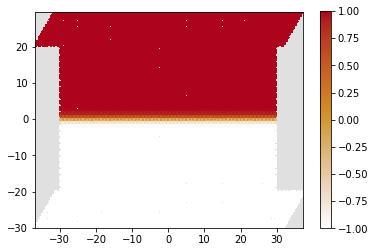

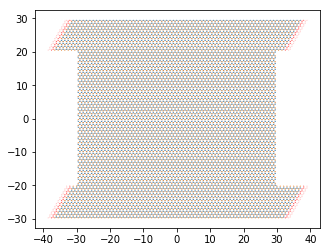

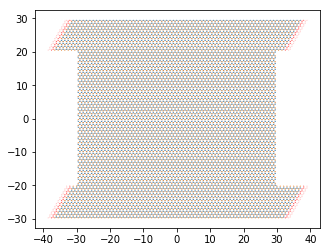

In [184]:
alat=1 ; W=45 ; L=60 ; t=1.0
h_l =  20 #teur du lead
w_l = 20 #largeur du lead
p=1
sys = make_system(alat,W,L,t, h_l, w_l)
s=t #aleur du potentiel
kwant.plotter.map(sys, jonction_pn)

sys = sys.finalized()
kwant.plot(sys)

#ok

In [185]:
def plot_transmission(sys, energy, params):
    # Compute conductance
    trans = []
    for param in params:
        smatrix = kwant.smatrix(sys, energy, args=[param])
        trans.append(smatrix.transmission(1, 0))
    plt.plot(params, trans)
    #ok

In [186]:

B = 1e-2 #champ magnétique
#kwant.plotter.bands(sys.leads[0]);
Field = np.linspace(-1e-2, 1e-2, 10)

-0.01


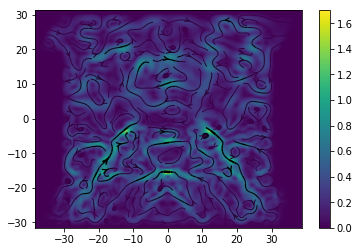

/home/jerem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()


-0.0077777777777777776


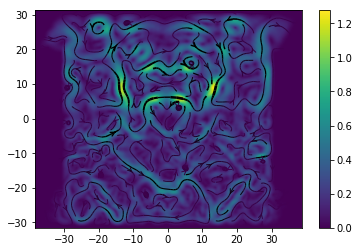

/home/jerem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()


-0.005555555555555556


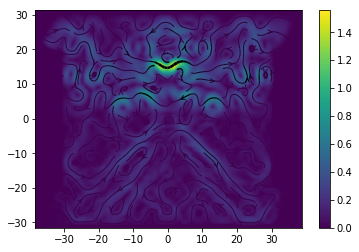

/home/jerem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()


-0.003333333333333334


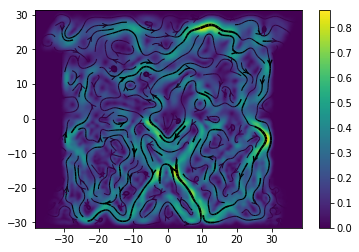

/home/jerem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()


-0.0011111111111111113


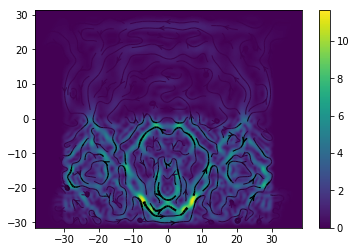

/home/jerem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()


0.0011111111111111113


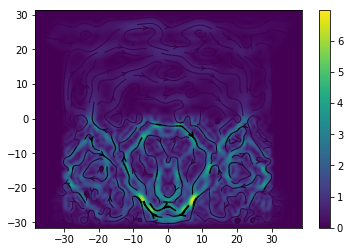

/home/jerem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()


0.0033333333333333322


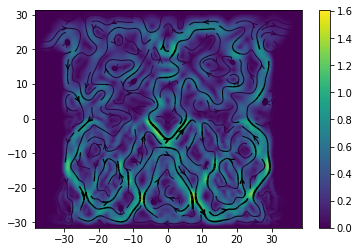

/home/jerem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()


0.005555555555555555


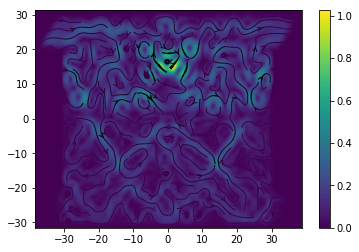

/home/jerem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()


0.0077777777777777776


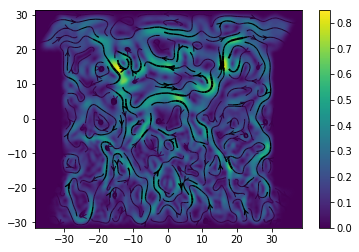

/home/jerem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()


0.01


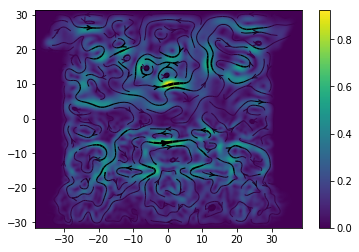

/home/jerem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()


In [187]:
for A in Field:
    B = A
    wfs = kwant.wave_function(sys, energy=Ef) # to obtain the wave functions of the system 
    de = kwant.operator.Density(sys)
    J0 = kwant.operator.Current(sys)
    wf_left = wfs(0)
    current = sum(J0(p) for p in wf_left)
    density = sum(de(p) for p in wf_left)
        #kwant.plotter.density(graph, density)
    print(B)
    kwant.plotter.current(sys, current, cmap='viridis');